In [1]:
# logistic regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
num_samples =100
carbon_emission = np.random.uniform(50,400,num_samples)
renewability_index=np.random.uniform(0,1,num_samples)
energy_output=np.random.uniform(100,1000,num_samples)
cost_efficiency=np.random.uniform(0.5,5,num_samples)

sustainability =[
    1 if (emission<200 and renewability >0.5 and cost <3) else 0
    for emission ,renewability,cost in zip(carbon_emission,renewability_index,cost_efficiency)
]
df =pd.DataFrame({
    "carbon_emission":carbon_emission,
    "renewability_index":renewability_index,
    "energy_output":energy_output,
    "cost_efficiency":cost_efficiency,
    "sustainability":sustainability
})


In [2]:
# display the first 5 rows and last 5 rows
print(df.head())
print(df.tail())

   carbon_emission  renewability_index  energy_output  cost_efficiency  \
0       181.089042            0.031429     677.828482         0.732568   
1       382.750007            0.636410     175.725968         2.891096   
2       306.197880            0.314356     245.465843         2.932858   
3       259.530469            0.508571     908.698770         3.368435   
4       104.606524            0.907566     645.786154         3.767411   

   sustainability  
0               0  
1               0  
2               0  
3               0  
4               0  
    carbon_emission  renewability_index  energy_output  cost_efficiency  \
95       222.828459            0.349210     570.018934         4.688408   
96       232.956490            0.725956     792.994198         4.362857   
97       199.639356            0.897110     294.238925         2.430473   
98        58.896694            0.887086     660.601428         3.878920   
99        87.761999            0.779876     176.812718      

In [3]:
df.isnull().sum() # to check the missing values - if missing values are present, use df = df.fllna(df.mean())

carbon_emission       0
renewability_index    0
energy_output         0
cost_efficiency       0
sustainability        0
dtype: int64

In [6]:
# feature selection
X= df[["carbon_emission","energy_output","renewability_index","cost_efficiency"]]
y= df["sustainability"] # target

In [7]:
# train and test sets
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [8]:
X_train.shape

(80, 4)

In [9]:
X_test.shape

(20, 4)

In [11]:
# Training the model
model =LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [13]:
# Accuracy Score
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score is {acc}")

Accuracy Score is 0.95


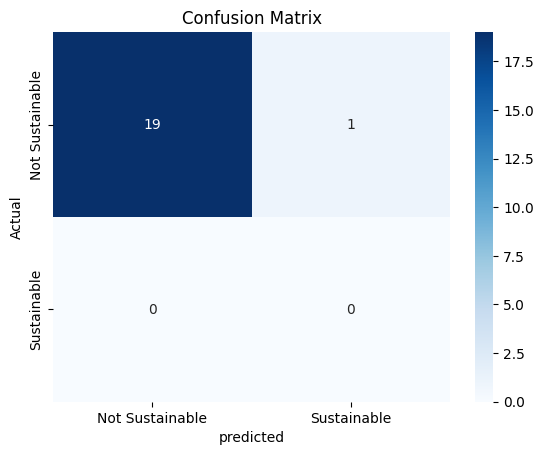

In [16]:
# Confusiion  Matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Not Sustainable", "Sustainable"], 
            yticklabels=["Not Sustainable", "Sustainable"])
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
# Classification Report
print(classification_report(y_test,y_pred,target_names=["Not Sustainable","Sustainable"]))

                 precision    recall  f1-score   support

Not Sustainable       1.00      0.95      0.97        20
    Sustainable       0.00      0.00      0.00         0

       accuracy                           0.95        20
      macro avg       0.50      0.47      0.49        20
   weighted avg       1.00      0.95      0.97        20



C:\Users\myahi_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\myahi_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\myahi_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [18]:
# Feature importance
coef = pd.DataFrame(model.coef_.T, index=X.columns, columns=["Coefficient"])
print(coef)

                    Coefficient
carbon_emission       -0.013189
energy_output          0.001610
renewability_index     1.344090
cost_efficiency       -0.584978


In [19]:
# Model Deployment
import joblib
joblib.dump(model,"LogRegSustainable.pkl")

['LogRegSustainable.pkl']